Author: Yusuf Abdi
Course: CS6140, Spring 2023

In [1]:
import pandas as pd
import numpy as np
# plot the charts inside jupyter inline as soon as plot gets generated
%matplotlib inline 
pd.set_option('display.max_rows',100) # show 100 rows in jupyter 
pd.set_option('display.max_columns', 100) # show data for 100 columns

In [2]:
# load vehicles data 
data = pd.read_csv('vehicles.csv',  low_memory=False) # low_memory set to False so datatypes can be correctly interpreted


In [3]:
# convert createdOn and modifiedOn to datetime objects

data['createdOn'] = pd.to_datetime(data['createdOn']) 
data['modifiedOn'] = pd.to_datetime(data['modifiedOn'])

## Q1
Discover an interesting aspect of the data that is not shown in the specimen. The specimen is using R language but you will reproduce the analysis in Python using libraries of your on choice.

In [4]:
data.head()

,barrels08,barrelsA08,charge120,charge240,city08,city08U,cityA08,cityA08U,cityCD,cityE,cityUF,co2,co2A,co2TailpipeAGpm,co2TailpipeGpm,comb08,comb08U,combA08,combA08U,combE,combinedCD,combinedUF,cylinders,displ,drive,engId,eng_dscr,feScore,fuelCost08,fuelCostA08,fuelType,fuelType1,ghgScore,ghgScoreA,highway08,highway08U,highwayA08,highwayA08U,highwayCD,highwayE,highwayUF,hlv,hpv,id,lv2,lv4,make,model,mpgData,phevBlended,pv2,pv4,range,rangeCity,rangeCityA,rangeHwy,rangeHwyA,trany,UCity,UCityA,UHighway,UHighwayA,VClass,year,youSaveSpend,guzzler,trans_dscr,tCharger,sCharger,atvType,fuelType2,rangeA,evMotor,mfrCode,c240Dscr,charge240b,c240bDscr,createdOn,modifiedOn,startStop,phevCity,phevHwy,phevComb
0,15.695714,0.0,0,0.0,19,0.0,0,0.0,0.0,0.0,0.0,-1,-1,0.0,423.190476,21,0.0,0,0.0,0.0,0.0,0.0,4.0,2.0,Rear-Wheel Drive,9011,(FFS),-1,2000,0,Regular,Regular Gasoline,-1,-1,25,0.0,0,0.0,0.0,0.0,0.0,0,0,1,0,0,Alfa Romeo,Spider Veloce 2000,Y,False,0,0,0,0.0,0.0,0.0,0.0,Manual 5-spd,23.3333,0.0,35.0000,0.0,Two Seaters,1985,-2250,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,2013-01-01 00:00:00-05:00,2013-01-01 00:00:00-05:00,NaN,0,0,0
1,29.964545,0.0,0,0.0,9,0.0,0,0.0,0.0,0.0,0.0,-1,-1,0.0,807.909091,11,0.0,0,0.0,0.0,0.0,0.0,12.0,4.9,Rear-Wheel Drive,22020,(GUZZLER),-1,3850,0,Regular,Regular Gasoline,-1,-1,14,0.0,0,0.0,0.0,0.0,0.0,0,0,10,0,0,Ferrari,Testarossa,N,False,0,0,0,0.0,0.0,0.0,0.0,Manual 5-spd,11.0000,0.0,19.0000,0.0,Two Seaters,1985,-11500,T,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,2013-01-01 00:00:00-05:00,2013-01-01 00:00:00-05:00,NaN,0,0,0
2,12.207778,0.0,0,0.0,23,0.0,0,0.0,0.0,0.0,0.0,-1,-1,0.0,329.148148,27,0.0,0,0.0,0.0,0.0,0.0,4.0,2.2,Front-Wheel Drive,2100,(FFS),-1,1550,0,Regular,Regular Gasoline,-1,-1,33,0.0,0,0.0,0.0,0.0,0.0,19,77,100,0,0,Dodge,Charger,Y,False,0,0,0,0.0,0.0,0.0,0.0,Manual 5-spd,29.0000,0.0,47.0000,0.0,Subcompact Cars,1985,0,NaN,SIL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,2013-01-01 00:00:00-05:00,2013-01-01 00:00:00-05:00,NaN,0,0,0
3,29.964545,0.0,0,0.0,10,0.0,0,0.0,0.0,0.0,0.0,-1,-1,0.0,807.909091,11,0.0,0,0.0,0.0,0.0,0.0,8.0,5.2,Rear-Wheel Drive,2850,NaN,-1,3850,0,Regular,Regular Gasoline,-1,-1,12,0.0,0,0.0,0.0,0.0,0.0,0,0,1000,0,0,Dodge,B150/B250 Wagon 2WD,N,False,0,0,0,0.0,0.0,0.0,0.0,Automatic 3-spd,12.2222,0.0,16.6667,0.0,Vans,1985,-11500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,2013-01-01 00:00:00-05:00,2013-01-01 00:00:00-05:00,NaN,0,0,0
4,17.347895,0.0,0,0.0,17,0.0,0,0.0,0.0,0.0,0.0,-1,-1,0.0,467.736842,19,0.0,0,0.0,0.0,0.0,0.0,4.0,2.2,4-Wheel or All-Wheel Drive,66031,"(FFS,TRBO)",-1,2700,0,Premium,Premium Gasoline,-1,-1,23,0.0,0,0.0,0.0,0.0,0.0,0,0,10000,0,14,Subaru,Legacy AWD Turbo,N,False,0,90,0,0.0,0.0,0.0,0.0,Manual 5-spd,21.0000,0.0,32.0000,0.0,Compact Cars,1993,-5750,NaN,NaN,T,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,2013-01-01 00:00:00-05:00,2013-01-01 00:00:00-05:00,NaN,0,0,0


In [5]:
data.shape # see the number of rows and variables of dataset


(40081, 83)

In [6]:
nulls = data.isnull().sum() / data.shape[0] * 100 # find the null values in each column in percentages
nulls.sort_values()

barrels08           0.000000
highwayA08U         0.000000
highwayCD           0.000000
highwayE            0.000000
highwayUF           0.000000
phevHwy             0.000000
hpv                 0.000000
id                  0.000000
lv2                 0.000000
lv4                 0.000000
make                0.000000
model               0.000000
mpgData             0.000000
phevBlended         0.000000
pv2                 0.000000
pv4                 0.000000
range               0.000000
rangeCity           0.000000
phevCity            0.000000
modifiedOn          0.000000
createdOn           0.000000
charge240b          0.000000
youSaveSpend        0.000000
year                0.000000
highwayA08          0.000000
VClass              0.000000
UHighway            0.000000
UCityA              0.000000
UCity               0.000000
rangeHwyA           0.000000
rangeHwy            0.000000
rangeCityA          0.000000
UHighwayA           0.000000
highway08U          0.000000
hlv           

In [7]:
too_many_nulls = nulls[nulls > 75].index.tolist() # get the null columns who have more than 75% null values
too_many_nulls

['guzzler',
 'tCharger',
 'sCharger',
 'atvType',
 'fuelType2',
 'rangeA',
 'evMotor',
 'mfrCode',
 'c240Dscr',
 'c240bDscr',
 'startStop']

In [8]:
len(too_many_nulls)


11

In [9]:
data_remove_nulls = data.drop(columns=too_many_nulls)


In [10]:
data_remove_nulls.describe(include='all',datetime_is_numeric=True).T # describe all data types as default is only numeric type


,count,unique,top,freq,mean,min,25%,50%,75%,max,std
barrels08,40081.0,NaN,NaN,NaN,17.363564,0.06,14.33087,16.4805,19.388824,47.087143,4.597119
barrelsA08,40081.0,NaN,NaN,NaN,0.220069,0.0,0.0,0.0,0.0,18.311667,1.14327
charge120,40081.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
charge240,40081.0,NaN,NaN,NaN,0.036086,0.0,0.0,0.0,0.0,12.0,0.534894
city08,40081.0,NaN,NaN,NaN,18.213318,6.0,15.0,17.0,20.0,150.0,7.397433
city08U,40081.0,NaN,NaN,NaN,5.494777,0.0,0.0,0.0,12.2736,150.0,11.027993
cityA08,40081.0,NaN,NaN,NaN,0.616077,0.0,0.0,0.0,0.0,145.0,4.739349
cityA08U,40081.0,NaN,NaN,NaN,0.466164,0.0,0.0,0.0,0.0,145.0835,4.563736
cityCD,40081.0,NaN,NaN,NaN,0.000471,0.0,0.0,0.0,0.0,5.35,0.039282
cityE,40081.0,NaN,NaN,NaN,0.274113,0.0,0.0,0.0,0.0,122.0,3.513989


<AxesSubplot: >

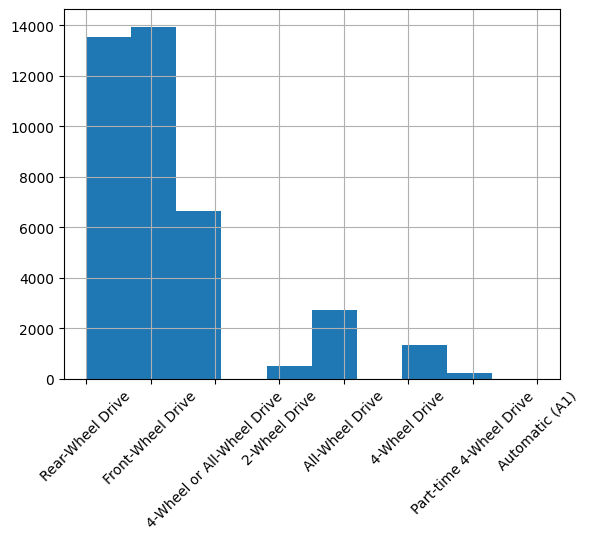

In [11]:
data_remove_nulls['drive'].hist(xrot=45)

In [12]:
data_remove_nulls['drive'].value_counts() / data_remove_nulls.shape[0] * 100

Front-Wheel Drive             34.777076
Rear-Wheel Drive              33.779097
4-Wheel or All-Wheel Drive    16.586413
All-Wheel Drive                6.768793
4-Wheel Drive                  3.313291
2-Wheel Drive                  1.264938
Part-time 4-Wheel Drive        0.541404
Automatic (A1)                 0.002495
Name: drive, dtype: float64

<AxesSubplot: title={'center': 'UCity'}, xlabel='cylinders'>

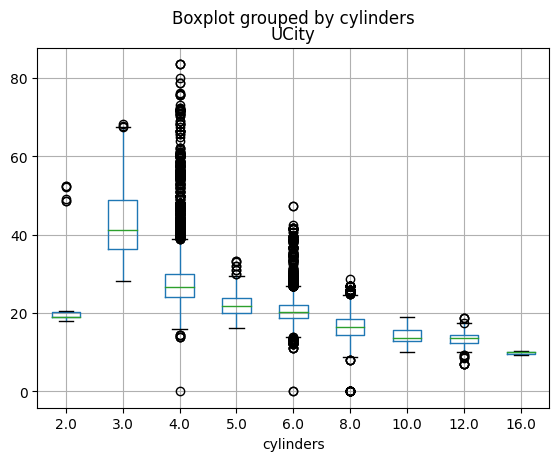

In [13]:
# let's explore how the UCity varies VS number of Cylinders
data_remove_nulls.boxplot('UCity', by='cylinders') 



### Ans
1. There are 8 drive types which are involved in this dataset
2. Majority of vehicles come either with Front or Rear wheel drives(almost 68%)
3. There was only 1 Automatic vehicle in dataset, it might be because the dataset is older as recent years we know there are lot more automatic vehicles around
4. We observed that even though with higher cylinders we get lower values of UCity, for 2-cylinder vehicles that not the case,we get very low emissions
5. There are 11 features which had more than 75% values as nulls, I am planning to remove them from final analysis because of that reason

## Q2

 The UCity variable is treated as dependent/target variable in the specimen. Discuss your approach to build a predictive model. Is it going to be a classification model or regression model. Why? (10)



In [14]:
# let's see how the values of Ucity variable look like and summarize to
data_remove_nulls['UCity'].describe()

count    40081.000000
mean        22.981798
std         10.473444
min          0.000000
25%         18.110500
50%         21.296500
75%         25.700000
max        224.800000
Name: UCity, dtype: float64

### Ans
As we could see the values of column `UCity` are interpreted as floats by pandas and they have values ranging from 0-225, this makes the problem of predicting the `UCity` values a regression problem. We will try to perform linear regression and ridge regression models to get the correct prediction outputs.

## Q3
Discuss which variables you will not consider as inputs to the model. Why? (30)

### Ans(initial thoughts)

1. remove columns with lot of null values
2. Omit categorical columns if too many categories
3. Multi-colinearity analysis and remove highly correlated features to each other(excep UCity)
4. remove datetime colume or process and create additional int/float coulmns from them

In [15]:
nulls = data_remove_nulls.isnull().sum() / data_remove_nulls.shape[0] * 100


In [16]:
nulls


barrels08           0.000000
barrelsA08          0.000000
charge120           0.000000
charge240           0.000000
city08              0.000000
city08U             0.000000
cityA08             0.000000
cityA08U            0.000000
cityCD              0.000000
cityE               0.000000
cityUF              0.000000
co2                 0.000000
co2A                0.000000
co2TailpipeAGpm     0.000000
co2TailpipeGpm      0.000000
comb08              0.000000
comb08U             0.000000
combA08             0.000000
combA08U            0.000000
combE               0.000000
combinedCD          0.000000
combinedUF          0.000000
cylinders           0.426636
displ               0.421646
drive               2.966493
engId               0.000000
eng_dscr           39.667174
feScore             0.000000
fuelCost08          0.000000
fuelCostA08         0.000000
fuelType            0.000000
fuelType1           0.000000
ghgScore            0.000000
ghgScoreA           0.000000
highway08     

In [67]:
# remove all columns with more than 35% null values
cols_remove = nulls[nulls > 35].index


In [68]:
cols_remove


Index(['eng_dscr', 'trans_dscr'], dtype='object')

In [65]:
len(cols_remove)


2

In [69]:
len(data_remove_nulls)


40081

In [21]:
len(data_remove_nulls)


40081

In [22]:
data_remove_nulls.drop(columns=cols_remove, inplace=True)


In [23]:
data_remove_nulls.shape


(40081, 70)

In [66]:
data_remove_nulls

,barrels08,barrelsA08,charge120,charge240,city08,city08U,cityA08,cityA08U,cityCD,cityE,cityUF,co2,co2A,co2TailpipeAGpm,co2TailpipeGpm,comb08,comb08U,combA08,combA08U,combE,combinedCD,combinedUF,cylinders,displ,drive,engId,feScore,fuelCost08,fuelCostA08,fuelType,fuelType1,ghgScore,ghgScoreA,highway08,highway08U,highwayA08,highwayA08U,highwayCD,highwayE,highwayUF,hlv,hpv,id,lv2,lv4,make,model,mpgData,phevBlended,pv2,pv4,range,rangeCity,rangeCityA,rangeHwy,rangeHwyA,trany,UCity,UCityA,UHighway,UHighwayA,VClass,year,youSaveSpend,charge240b,createdOn,modifiedOn,phevCity,phevHwy,phevComb
0,15.695714,0.0,0,0.0,19,0.0,0,0.0,0.0,0.0,0.0,-1,-1,0.0,423.190476,21,0.0,0,0.0,0.0,0.0,0.0,4.0,2.0,Rear-Wheel Drive,9011,-1,2000,0,Regular,Regular Gasoline,-1,-1,25,0.0,0,0.0,0.0,0.0,0.0,0,0,1,0,0,Alfa Romeo,Spider Veloce 2000,Y,False,0,0,0,0.0,0.0,0.0,0.0,Manual 5-spd,23.3333,0.0,35.0000,0.0,Two Seaters,1985,-2250,0.0,2013-01-01 00:00:00-05:00,2013-01-01 00:00:00-05:00,0,0,0
1,29.964545,0.0,0,0.0,9,0.0,0,0.0,0.0,0.0,0.0,-1,-1,0.0,807.909091,11,0.0,0,0.0,0.0,0.0,0.0,12.0,4.9,Rear-Wheel Drive,22020,-1,3850,0,Regular,Regular Gasoline,-1,-1,14,0.0,0,0.0,0.0,0.0,0.0,0,0,10,0,0,Ferrari,Testarossa,N,False,0,0,0,0.0,0.0,0.0,0.0,Manual 5-spd,11.0000,0.0,19.0000,0.0,Two Seaters,1985,-11500,0.0,2013-01-01 00:00:00-05:00,2013-01-01 00:00:00-05:00,0,0,0
2,12.207778,0.0,0,0.0,23,0.0,0,0.0,0.0,0.0,0.0,-1,-1,0.0,329.148148,27,0.0,0,0.0,0.0,0.0,0.0,4.0,2.2,Front-Wheel Drive,2100,-1,1550,0,Regular,Regular Gasoline,-1,-1,33,0.0,0,0.0,0.0,0.0,0.0,19,77,100,0,0,Dodge,Charger,Y,False,0,0,0,0.0,0.0,0.0,0.0,Manual 5-spd,29.0000,0.0,47.0000,0.0,Subcompact Cars,1985,0,0.0,2013-01-01 00:00:00-05:00,2013-01-01 00:00:00-05:00,0,0,0
3,29.964545,0.0,0,0.0,10,0.0,0,0.0,0.0,0.0,0.0,-1,-1,0.0,807.909091,11,0.0,0,0.0,0.0,0.0,0.0,8.0,5.2,Rear-Wheel Drive,2850,-1,3850,0,Regular,Regular Gasoline,-1,-1,12,0.0,0,0.0,0.0,0.0,0.0,0,0,1000,0,0,Dodge,B150/B250 Wagon 2WD,N,False,0,0,0,0.0,0.0,0.0,0.0,Automatic 3-spd,12.2222,0.0,16.6667,0.0,Vans,1985,-11500,0.0,2013-01-01 00:00:00-05:00,2013-01-01 00:00:00-05:00,0,0,0
4,17.347895,0.0,0,0.0,17,0.0,0,0.0,0.0,0.0,0.0,-1,-1,0.0,467.736842,19,0.0,0,0.0,0.0,0.0,0.0,4.0,2.2,4-Wheel or All-Wheel Drive,66031,-1,2700,0,Premium,Premium Gasoline,-1,-1,23,0.0,0,0.0,0.0,0.0,0.0,0,0,10000,0,14,Subaru,Legacy AWD Turbo,N,False,0,90,0,0.0,0.0,0.0,0.0,Manual 5-spd,21.0000,0.0,32.0000,0.0,Compact Cars,1993,-5750,0.0,2013-01-01 00:00:00-05:00,2013-01-01 00:00:00-05:00,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40076,14.982273,0.0,0,0.0,19,0.0,0,0.0,0.0,0.0,0.0,-1,-1,0.0,403.954545,22,0.0,0,0.0,0.0,0.0,0.0,4.0,2.2,Front-Wheel Drive,66030,-1,1950,0,Regular,Regular Gasoline,-1,-1,26,0.0,0,0.0,0.0,0.0,0.0,0,0,9995,0,14,Subaru,Legacy,N,False,0,90,0,0.0,0.0,0.0,0.0,Automatic 4-spd,24.0000,0.0,37.0000,0.0,Compact Cars,1993,-2000,0.0,2013-01-01 00:00:00-05:00,2013-01-01 00:00:00-05:00,0,0,0
40077,14.330870,0.0,0,0.0,20,0.0,0,0.0,0.0,0.0,0.0,-1,-1,0.0,386.391304,23,0.0,0,0.0,0.0,0.0,0.0,4.0,2.2,Front-Wheel Drive,66030,-1,1850,0,Regular,Regular Gasoline,-1,-1,28,0.0,0,0.0,0.0,0.0,0.0,0,0,9996,0,14,Subaru,Legacy,N,False,0,90,0,0.0,0.0,0.0,0.0,Manual 5-spd,25.0000,0.0,39.0000,0.0,Compact Cars,1993,-1500,0.0,2013-01-01 00:00:00-05:00,2013-01-01 00:00:00-05:00,0,0,0
40078,15.695714,0.0,0,0.0,18,0.0,0,0.0,0.0,0.0,0.0,-1,-1,0.0,423.190476,21,0.0,0,0.0,0.0,0.0,0.0,4.0,2.2,4-Wheel or All-Wheel Drive,66030,-1,2000,0,Regular,Regular Gasoline,-1,-1,24,0.0,0,0.0,0.0,0.0,0.0,0,0,9997,0,14,Subaru,Legacy AWD,Y,False,0,90,0,0.0,0.0,0.0,0.0,Automatic 4-spd,23.0000,0.0,34.0000,0.0,Compact Cars,1993,-2250,0.0,2013-01-01 00:00:00-05:00,2013-01-01 00:00:00-05:00,0,0,0
40079,15.695714,0.0,0,0.0,18,0.0,0,0.0,0.0,0.0,0.0,-1,-1,0.0,423.190476,21,0.0,0,0.

In [24]:
# look at categorical columns and remove columns with more than 10 categories
cat_summary = data_remove_nulls.describe(include='object').T
too_many_cats = cat_summary[cat_summary['unique'] > 10].index 

model_data = data_remove_nulls.drop(columns=too_many_cats)

In [70]:
cat_summary

,count,unique,top,freq
drive,38892,8,Front-Wheel Drive,13939
fuelType,40081,14,Regular,25997
fuelType1,40081,6,Regular Gasoline,27344
make,40081,135,Chevrolet,3944
model,40081,3960,F150 Pickup 2WD,215
mpgData,40081,2,N,27367
trany,40070,37,Automatic 4-spd,11045
VClass,40081,34,Compact Cars,5751


In [72]:
len(too_many_cats)

5

In [73]:
too_many_cats.shape

(5,)

In [75]:
len(model_data)


40081

In [26]:
corr = model_data.drop(columns=['UCity']).corr()
corr.style.background_gradient('coolwarm') # visualize the correlation matrix

/var/folders/v7/g4nthr096wd71_rgdjf3qlcm0000gn/T/ipykernel_36095/2678166335.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = model_data.drop(columns=['UCity']).corr()
/Users/yusufabdi/micromamba/envs/data_science/lib/python3.9/site-packages/pandas/io/formats/style.py:3931: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(gmap) if vmin is None else vmin
/Users/yusufabdi/micromamba/envs/data_science/lib/python3.9/site-packages/pandas/io/formats/style.py:3932: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(gmap) if vmax is None else vmax


,barrels08,barrelsA08,charge120,charge240,city08,city08U,cityA08,cityA08U,cityCD,cityE,cityUF,co2,co2A,co2TailpipeAGpm,co2TailpipeGpm,comb08,comb08U,combA08,combA08U,combE,combinedCD,combinedUF,cylinders,displ,engId,feScore,fuelCost08,fuelCostA08,ghgScore,ghgScoreA,highway08,highway08U,highwayA08,highwayA08U,highwayCD,highwayE,highwayUF,hlv,hpv,id,lv2,lv4,phevBlended,pv2,pv4,range,rangeCity,rangeCityA,rangeHwy,rangeHwyA,UCityA,UHighway,UHighwayA,year,youSaveSpend,charge240b,phevCity,phevHwy,phevComb
barrels08,1.000000,0.083513,nan,-0.234069,-0.733511,-0.417485,-0.092679,-0.112635,-0.020350,-0.241687,-0.127775,-0.135412,0.029924,0.108044,0.988225,-0.792373,-0.412672,-0.086341,-0.109222,-0.244770,-0.017372,-0.127620,0.736043,0.786661,-0.053295,-0.377843,0.925558,0.104626,-0.378769,-0.011763,-0.841591,-0.398677,-0.076099,-0.102635,-0.013049,-0.247430,-0.127268,-0.254838,-0.289926,-0.232272,-0.109739,-0.252234,-0.103457,-0.110524,-0.304143,-0.206486,-0.196728,-0.113813,-0.190176,-0.115527,-0.101062,-0.845072,-0.082157,-0.241184,-0.927361,-0.143238,-0.126872,-0.128997,-0.128096
barrelsA08,0.083513,1.000000,nan,0.027478,-0.066524,0.082373,0.517412,0.377376,0.134321,0.095467,0.125350,0.133669,0.575335,0.968870,0.084753,-0.072238,0.089341,0.572354,0.417435,0.092897,0.128043,0.126025,0.146220,0.164399,-0.089783,0.068133,0.058250,0.969489,0.071235,0.518028,-0.073465,0.097324,0.643322,0.472588,0.117119,0.089954,0.126548,-0.054695,-0.060574,0.163791,-0.062320,-0.060965,0.181382,-0.062971,-0.067138,-0.010657,-0.010147,0.085034,-0.009810,0.091047,0.464021,-0.075795,0.619393,0.177287,-0.054889,-0.007387,0.113234,0.124688,0.118358
charge120,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
charge240,-0.234069,0.027478,nan,1.000000,0.626155,0.484871,0.230988,0.239247,0.058882,0.692115,0.284172,-0.018301,-0.008003,-0.012776,-0.238485,0.599916,0.439955,0.222946,0.233773,0.689706,0.053830,0.284759,-0.039789,-0.048957,-0.031815,0.223755,-0.154259,-0.002351,0.228014,-0.007994,0.536972,0.375222,0.208257,0.222130,0.045417,0.684026,0.285393,0.116531,0.093035,0.097398,-0.024710,-0.016898,0.198010,-0.024932,-0.016261,0.916209,0.921881,0.258554,0.917303,0.264728,0.238958,0.505326,0.212126,0.091171,0.162331,0.797108,0.264197,0.272454,0.268272
city08,-0.733511,-0.066524,nan,0.626155,1.000000,0.634739,0.071967,0.087104,0.005199,0.483971,0.095500,0.059493,-0.033440,-0.081693,-0.745971,0.989079,0.585683,0.064715,0.082145,0.497814,0.002729,0.094567,-0.697187,-0.730718,0.044227,0.398445,-0.678709,-0.079911,0.397964,-0.009640,0.935514,0.516380,0.053650,0.073822,-0.000570,0.512009,0.093169,0.237672,0.264837,0.187426,0.023162,0.129507,0.081311,0.021485,0.163264,0.605259,0.598004,0.086756,0.567042,0.085743,0.078756,0.930823,0.057649,0.171899,0.679612,0.421593,0.106312,0.103852,0.105581
city08U,-0.417485,0.082373,nan,0.484871,0.634739,1.000000,0.153350,0.176011,0.016995,0.355309,0.118626,0.592376,0.113993,0.065085,-0.425525,0.631765,0.995279,0.155239,0.181706,0.362396,0.013681,0.118000,-0.119800,-0.139627,-0.234134,0.814636,-0.321337,0.067097,0.814159,0.129920,0.608779,0.976430,0.155825,0.188229,0.009045,0.369349,0.117027,0.043884,0.041687,0.649026,-0.061690,0.006129,0.104676,-0.039024,0.048774,0.444883,0.460611,0.103857,0.438076,0.104293,0.153515,0.620118,0.158926,0.633347,0.323701,0.327472,0.123950,0.124224,0.124405
cityA08,-0.092679,0.517412,nan,0.230988,0.071967,0.153350,1.000000,0.957474,0.079173,0.495662,0.857728,0.079225,0.277162,0.413894,-0.094040,0.063117,0.149990,0.995982,0.953955,0.494335,0.064062,0.855230,0.005988,0.008685,-0.060832,0.175581,-0.051870,0.435191,0.185074,0.302529,0.047713,0.142106,0.977961,0.937702,0.042930,0.492043,0.850838,-0.000504,-0.004204,0.138832,-0.037638,-0.012060,0.687845,-0.036249,0.001035,-0.007197,-0.006852,0.776008,-0.006625,0.781586,0.994726,

In [27]:
def find_correlated_features(df, threshold, target_variable):
    # remove target column
    df = df.drop(columns=target_variable).copy()
    # Get correlation matrix
    corr_matrix = df.corr().abs()
    # Take half of the matrix to prevent doubling results
    corr_matrix = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k = 1).astype(np.bool_))
    # Restructure correlation matrix to dataframe
    df = corr_matrix.stack().reset_index()
    df.columns = ['feature1', 'feature2', 'corr_coef']
    # Apply filter and sort coefficients
    df = df[df.corr_coef >= threshold].sort_values('corr_coef', ascending=False)
    return df

In [28]:
high_correlated_pairs = find_correlated_features(model_data, 0.75, 'UCity')

/var/folders/v7/g4nthr096wd71_rgdjf3qlcm0000gn/T/ipykernel_36095/2258990157.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr().abs()


In [29]:
# let's filter columns which are highly correlate(0.65)
highly_correlated_features = high_correlated_pairs['feature1'].unique()

In [30]:
len(highly_correlated_features)

45

In [31]:
# no longer multicollinearity in data
find_correlated_features(model_data.drop(columns=highly_correlated_features), 0.75, 'UCity')

/var/folders/v7/g4nthr096wd71_rgdjf3qlcm0000gn/T/ipykernel_36095/2258990157.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr().abs()


,feature1,feature2,corr_coef


In [32]:
# remove the highly correlated features
model_data.drop(columns=highly_correlated_features,inplace=True) 

In [33]:
model_data.head()

,charge120,drive,engId,fuelCostA08,fuelType1,ghgScoreA,highway08U,highwayCD,highwayE,hpv,mpgData,pv2,pv4,UCity,year,youSaveSpend,charge240b,createdOn,modifiedOn,phevComb
0,0,Rear-Wheel Drive,9011,0,Regular Gasoline,-1,0.0,0.0,0.0,0,Y,0,0,23.3333,1985,-2250,0.0,2013-01-01 00:00:00-05:00,2013-01-01 00:00:00-05:00,0
1,0,Rear-Wheel Drive,22020,0,Regular Gasoline,-1,0.0,0.0,0.0,0,N,0,0,11.0000,1985,-11500,0.0,2013-01-01 00:00:00-05:00,2013-01-01 00:00:00-05:00,0
2,0,Front-Wheel Drive,2100,0,Regular Gasoline,-1,0.0,0.0,0.0,77,Y,0,0,29.0000,1985,0,0.0,2013-01-01 00:00:00-05:00,2013-01-01 00:00:00-05:00,0
3,0,Rear-Wheel Drive,2850,0,Regular Gasoline,-1,0.0,0.0,0.0,0,N,0,0,12.2222,1985,-11500,0.0,2013-01-01 00:00:00-05:00,2013-01-01 00:00:00-05:00,0
4,0,4-Wheel or All-Wheel Drive,66031,0,Premium Gasoline,-1,0.0,0.0,0.0,0,N,0,90,21.0000,1993,-5750,0.0,2013-01-01 00:00:00-05:00,2013-01-01 00:00:00-05:00,0


In [34]:
# remove datetime columns
model_data.drop(columns=['modifiedOn','createdOn'], inplace=True)

In [35]:
# split the data to train vs test to understand how well model is fitting and avoid over or under-fitting
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(model_data.drop(columns=['UCity']), model_data['UCity'], test_size=0.2, random_state=123)

In [36]:
X_train.head()

,charge120,drive,engId,fuelCostA08,fuelType1,ghgScoreA,highway08U,highwayCD,highwayE,hpv,mpgData,pv2,pv4,year,youSaveSpend,charge240b,phevComb
11707,0,Front-Wheel Drive,0,0,Premium Gasoline,-1,0.0,0.0,0.0,0,N,75,0,2005,-4500,0.0,0
39170,0,Front-Wheel Drive,59003,0,Regular Gasoline,-1,0.0,0.0,0.0,0,N,0,99,1992,-2250,0.0,0
33483,0,Front-Wheel Drive,59005,0,Regular Gasoline,-1,0.0,0.0,0.0,0,N,87,87,1985,-2000,0.0,0
7116,0,Front-Wheel Drive,0,1650,Regular Gasoline,-1,0.0,0.0,0.0,0,Y,0,92,2000,-2000,0.0,0
10675,0,Front-Wheel Drive,0,0,Regular Gasoline,-1,0.0,0.0,0.0,88,Y,0,88,2004,-1000,0.0,0


In [37]:
X_train.shape, X_test.shape

((32064, 17), (8017, 17))

In [77]:
y_train.shape, y_test.shape

((32064,), (8017,))

In [38]:
X_train.columns

Index(['charge120', 'drive', 'engId', 'fuelCostA08', 'fuelType1', 'ghgScoreA',
       'highway08U', 'highwayCD', 'highwayE', 'hpv', 'mpgData', 'pv2', 'pv4',
       'year', 'youSaveSpend', 'charge240b', 'phevComb'],
      dtype='object')

In [39]:
X_train.isnull().sum(), 


(charge120         0
 drive           932
 engId             0
 fuelCostA08       0
 fuelType1         0
 ghgScoreA         0
 highway08U        0
 highwayCD         0
 highwayE          0
 hpv               0
 mpgData           0
 pv2               0
 pv4               0
 year              0
 youSaveSpend      0
 charge240b        0
 phevComb          0
 dtype: int64,)

In [40]:
X_test.isnull().sum(), 


(charge120         0
 drive           257
 engId             0
 fuelCostA08       0
 fuelType1         0
 ghgScoreA         0
 highway08U        0
 highwayCD         0
 highwayE          0
 hpv               0
 mpgData           0
 pv2               0
 pv4               0
 year              0
 youSaveSpend      0
 charge240b        0
 phevComb          0
 dtype: int64,)

In [41]:
from sklearn.impute import SimpleImputer

imp = SimpleImputer(strategy='most_frequent')
imp.fit(X_train[['drive']])

SimpleImputer(strategy='most_frequent')

In [42]:
X_train['drive'] = imp.transform(X_train[['drive']])

In [43]:
ohe = OneHotEncoder(handle_unknown='ignore', drop='if_binary')

In [44]:
x_train_cat_cols = X_train.describe(include='object').columns.tolist()

In [45]:
ohe_values = ohe.fit(X_train[x_train_cat_cols])

In [46]:
cat_names = []
for cat_col, categories in zip(x_train_cat_cols, ohe.categories_):
    if len(categories) > 2:
        for category in categories:
            cat_names.append(f'{cat_col}_{category}')
    else:
        cat_names.append(cat_col)
cat_names

['drive_2-Wheel Drive',
 'drive_4-Wheel Drive',
 'drive_4-Wheel or All-Wheel Drive',
 'drive_All-Wheel Drive',
 'drive_Automatic (A1)',
 'drive_Front-Wheel Drive',
 'drive_Part-time 4-Wheel Drive',
 'drive_Rear-Wheel Drive',
 'fuelType1_Diesel',
 'fuelType1_Electricity',
 'fuelType1_Midgrade Gasoline',
 'fuelType1_Natural Gas',
 'fuelType1_Premium Gasoline',
 'fuelType1_Regular Gasoline',
 'mpgData']

In [47]:
def one_hot_encode(encoder, df, cat_cols, cat_names):
    ohe_values = encoder.transform(df[cat_cols]).toarray()
    df_new = df.drop(columns=cat_cols)
    df_new[cat_names] = ohe_values
    return df_new


In [48]:
X_train_ohe = one_hot_encode(ohe, X_train, x_train_cat_cols, cat_names)

In [49]:
import  statsmodels.api as sm
X_train_ohe_const = sm.add_constant(X_train_ohe)

model = sm.OLS(y_train, X_train_ohe_const).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  UCity   R-squared:                       0.889
Model:                            OLS   Adj. R-squared:                  0.889
Method:                 Least Squares   F-statistic:                     9869.
Date:                Mon, 24 Jul 2023   Prob (F-statistic):               0.00
Time:                        21:46:04   Log-Likelihood:                -86001.
No. Observations:               32064   AIC:                         1.721e+05
Df Residuals:                   32037   BIC:                         1.723e+05
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

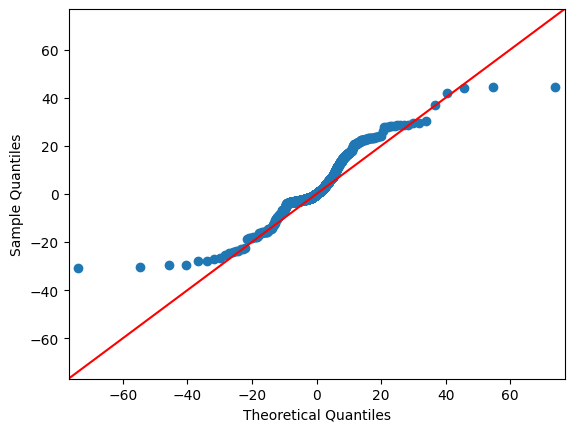

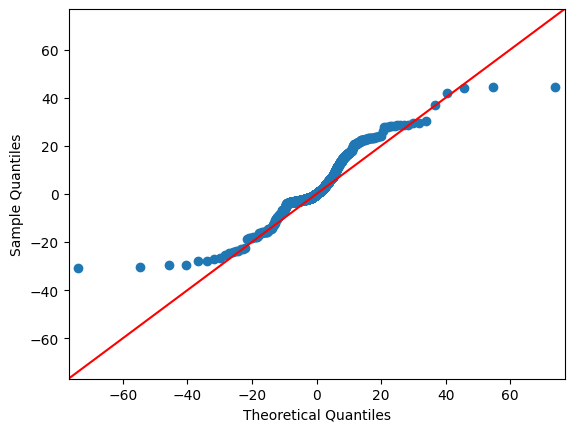

In [50]:
from scipy import stats
res=model.resid
sm.qqplot(res, stats.t, fit=True, line="45")


In [51]:
# perform same preprocessing as we did for training data on the test dataset
X_test[['drive']] = imp.transform(X_test[['drive']])
X_test_ohe = one_hot_encode(ohe, X_test, x_train_cat_cols, cat_names)


In [52]:
from sklearn.metrics import mean_squared_error
import math

In [53]:
y_pred = model.predict(sm.add_constant(X_train_ohe))

# get the root mean square error on test datatset
train_error = math.sqrt(mean_squared_error(y_pred=y_pred, y_true=y_train))

print(f'Training RMSE:: {train_error:.2f}')

Training RMSE:: 3.54


In [54]:
y_pred = model.predict(sm.add_constant(X_test_ohe))

# get the root mean square error on test datatset
test_error = math.sqrt(mean_squared_error(y_pred=y_pred, y_true=y_test))

print(f'Testing RMSE:: {test_error:.2f}')

Testing RMSE:: 3.33


In [55]:
# remove features who have p-value( P>|t|) value greater than 0.05 as they are not significant in model learning
all_palues = model.pvalues
low_significant_features = all_palues[all_palues > 0.05].index

In [56]:
final_X_train = X_train_ohe_const.drop(columns=low_significant_features)


In [57]:
low_significant_features


Index(['pv4', 'fuelType1_Diesel', 'fuelType1_Premium Gasoline'], dtype='object')

In [58]:
model_2 = sm.OLS(y_train, final_X_train).fit()
print(model_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  UCity   R-squared:                       0.889
Model:                            OLS   Adj. R-squared:                  0.889
Method:                 Least Squares   F-statistic:                 1.067e+04
Date:                Mon, 24 Jul 2023   Prob (F-statistic):               0.00
Time:                        21:46:05   Log-Likelihood:                -86031.
No. Observations:               32064   AIC:                         1.721e+05
Df Residuals:                   32039   BIC:                         1.723e+05
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

In [59]:
y_pred = model_2.predict(sm.add_constant(final_X_train))

# get the root mean square error on test datatset
train_error = math.sqrt(mean_squared_error(y_pred=y_pred, y_true=y_train))

print(f'Training RMSE for final model:: {train_error:.2f}')

Training RMSE for final model:: 3.54


In [60]:
y_pred = model_2.predict(sm.add_constant(X_test_ohe.drop(columns=low_significant_features)))

# get the root mean square error on test datatset
test_error = math.sqrt(mean_squared_error(y_pred=y_pred, y_true=y_test))

print(f'Testing RMSE:: {test_error:.2f}')

Testing RMSE:: 3.34


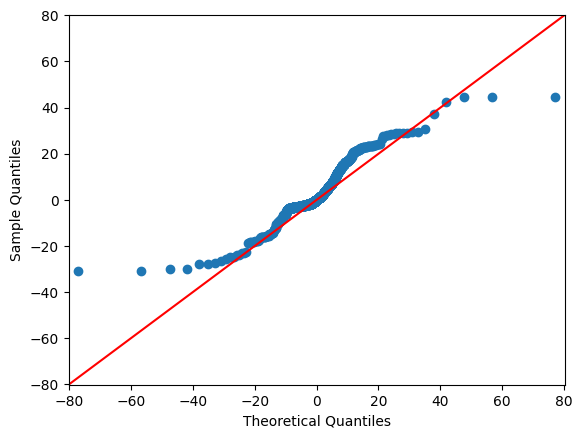

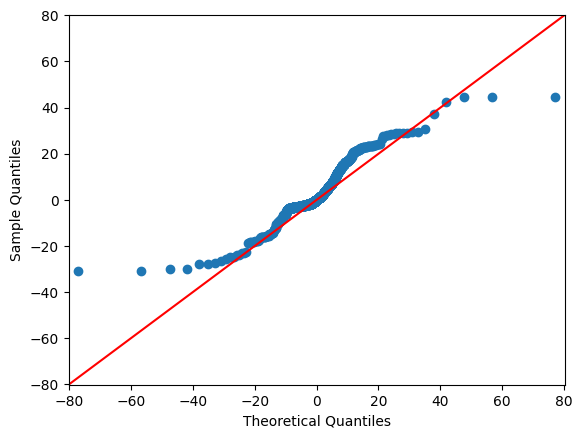

In [61]:

res2=model_2.resid
sm.qqplot(res2, stats.t, fit=True, line="45")

### Ans(final model inputs)
1. We removed features which were highly correlated, though model outputs suggest it might have correlated features due to lower correlation values
1. I tried to modify correlation value and filter the correlation higher than 0.65 but it gave me higher RMSE incidating worse model than one I got by filtering correlated featurs for more than 0.75
2. We came down to use only 17 features from original dataset: ['charge120', 'drive', 'engId', 'fuelCostA08', 'fuelType1', 'ghgScoreA',
       'highway08U', 'highwayCD', 'highwayE', 'hpv', 'mpgData', 'pv2', 'pv4',
       'year', 'youSaveSpend', 'charge240b', 'phevComb']
3. We had to convert few (3) categorical features to numbers by doing One hot encoding which increased out features to 30 includeing constant
4. In final model I removed features whose signifance in model was higher tha 0.05 which removed 3 more features
5. We still got same RMSE values for train and test dataset with lower features and model R-Square value remained same indicating its a good model as I had trained with 30 features
6. To validate goodness of fit I had plotted qqplots, though there are residuals who are not along the digonal values of quantiles, most(70%) of the residuals followed diagonal errors, this remained same even after reducing features.
7. Final list of features used(includes one hot encoded category columns and constant) in following cell

In [62]:
final_X_train.columns


Index(['const', 'charge120', 'engId', 'fuelCostA08', 'ghgScoreA', 'highway08U',
       'highwayCD', 'highwayE', 'hpv', 'pv2', 'year', 'youSaveSpend',
       'charge240b', 'phevComb', 'drive_2-Wheel Drive', 'drive_4-Wheel Drive',
       'drive_4-Wheel or All-Wheel Drive', 'drive_All-Wheel Drive',
       'drive_Automatic (A1)', 'drive_Front-Wheel Drive',
       'drive_Part-time 4-Wheel Drive', 'drive_Rear-Wheel Drive',
       'fuelType1_Electricity', 'fuelType1_Midgrade Gasoline',
       'fuelType1_Natural Gas', 'fuelType1_Regular Gasoline', 'mpgData'],
      dtype='object')

# Q4

How will you evaluate your model to avoid over-fitting/under-fitting.


### Answer
1. To avoid overfitting I mainly focused on train vs test dataset approach
2. In thir process I trained model with 80% of dataset and tested on unseen 20% dataset
3. Main though is the model should produce same error/accuracy on train data as it does on test dataset
4. I used RMSE metrics to evaluate model
5. In case of overfitting we should have seen model having very less error values for training data than that of testing data
6. In case of underfitting the models training error would have been higher and fluctuated(lower usually) vastly for test dataset
7. I got training RMSE of 3.54 which was very close to testing data RMSE 3.34 indicating no overfitting or underfitting
8. I have also plotted qqplot to see if the residuals have fit well for linear model and it does show good fit for 70% of trainig data, few anamolous datapoints along the high/low quantiles